In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

####Importing Data set (types of driving)

In [143]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Individual Project 1/Data/Combined Set.csv")

Large affect if dropping time

In [144]:
#data = data.drop("Timestamp", axis = 1)

In [145]:
import time

seconds = 3583789

convert = time.strftime("%H:%M:%S", time.gmtime(seconds))

print(convert)

11:29:49


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


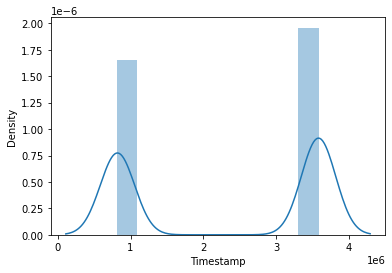

In [146]:
sns.distplot(data['Timestamp']) 

##Cleaning

Counts are relativly even, therefore no need for stratification

In [147]:
data["Class"].value_counts()

SLOW          2604
NORMAL        2197
AGGRESSIVE    1927
Name: Class, dtype: int64

Checking type and null values

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6728 entries, 0 to 6727
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       6728 non-null   float64
 1   AccY       6728 non-null   float64
 2   AccZ       6728 non-null   float64
 3   GyroX      6728 non-null   float64
 4   GyroY      6728 non-null   float64
 5   GyroZ      6728 non-null   float64
 6   Class      6728 non-null   object 
 7   Timestamp  6728 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 420.6+ KB


No null values and one object value so need to address that

Due to Class being Slow, Normal, Aggressive, it has order and therefore needs ordinal encoding.

DONT NEED TO ENCODE FOR CLASSIFIER PROBLEMS

In [149]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [150]:
data['Class'] = encoder.fit_transform(data[['Class']])

In [151]:
data['Class'].value_counts()

2.0    2604
1.0    2197
0.0    1927
Name: Class, dtype: int64

##Classification

Finding the best out of:
Logistic Regression/ SVC/ DT/ RF

using: Voting Classifier

###Training

In [152]:
from sklearn.model_selection import train_test_split
X = data.drop("Class", axis = 1)
y = data.Class

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state = 42)

##Voting Classifier

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Defining classifiers

In [155]:
log_clf = LogisticRegression(
                             max_iter = 10000)

rf_clf = RandomForestClassifier()

dt_clf_gini = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  random_state = 0)

svm_clf = SVC(gamma = 'auto', probability = True)

Defining actual function

In [156]:
voting_clf = VotingClassifier(
    estimators = [("Logistic Regression", log_clf),
                  ("Random Forest Classifier", rf_clf),
                  ("Decision Tree Classifier", dt_clf_gini),
                  ("Support Vector Classifier", svm_clf)],
    voting = 'soft'
)

In [157]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(max_iter=10000)),
                             ('Random Forest Classifier',
                              RandomForestClassifier()),
                             ('Decision Tree Classifier',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=0)),
                             ('Support Vector Classifier',
                              SVC(gamma='auto', probability=True))],
                 voting='soft')

In [158]:
from sklearn.metrics import accuracy_score

for clf in(log_clf, rf_clf, svm_clf,dt_clf_gini, voting_clf):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.37592867756315007
RandomForestClassifier 0.9970282317979198
SVC 1.0
DecisionTreeClassifier 1.0
VotingClassifier 1.0


##Confusion Matrix

In [159]:
y_pred = voting_clf.predict(X_test)

In [160]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[203   0   0]
 [  0 217   0]
 [  0   0 253]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       203
         1.0       1.00      1.00      1.00       217
         2.0       1.00      1.00      1.00       253

    accuracy                           1.00       673
   macro avg       1.00      1.00      1.00       673
weighted avg       1.00      1.00      1.00       673



In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       203
         1.0       1.00      1.00      1.00       217
         2.0       1.00      1.00      1.00       253

    accuracy                           1.00       673
   macro avg       1.00      1.00      1.00       673
weighted avg       1.00      1.00      1.00       673

